In [2]:
import sys
sys.path.append('../utils')

from stardist import random_label_cmap

from functions import *

In [3]:
model_path = r'path_to_model'

model = load_model(model_path)

base_model.py (149): output path for model already exists, files may be overwritten: \\10.162.80.16\Andre_expansion\data\Stardist\12_12_hyperparameter_models\monkey_12_12_2023_lr_0.001_epochs_400_pt_10_gaus_ratio_0\offshoot_model


Using default values: prob_thresh=0.5, nms_thresh=0.4.
Overriding defaults: Thresholds(prob=0.6883699162882626, nms=0.3) 


In [4]:
testing_tiles_path = r'testing_tiles_path'
testing_masks_path = r'testing_masks_path'

testing_tiles = normalize_images(read_tiles(testing_tiles_path))
testing_masks = read_masks(testing_masks_path)

In [5]:
predictions = segment_tiles(testing_tiles, model)

100%|██████████| 36/36 [00:04<00:00,  7.57it/s]


In [6]:
#Random color map labels
np.random.seed(42)
lbl_cmap = random_label_cmap()

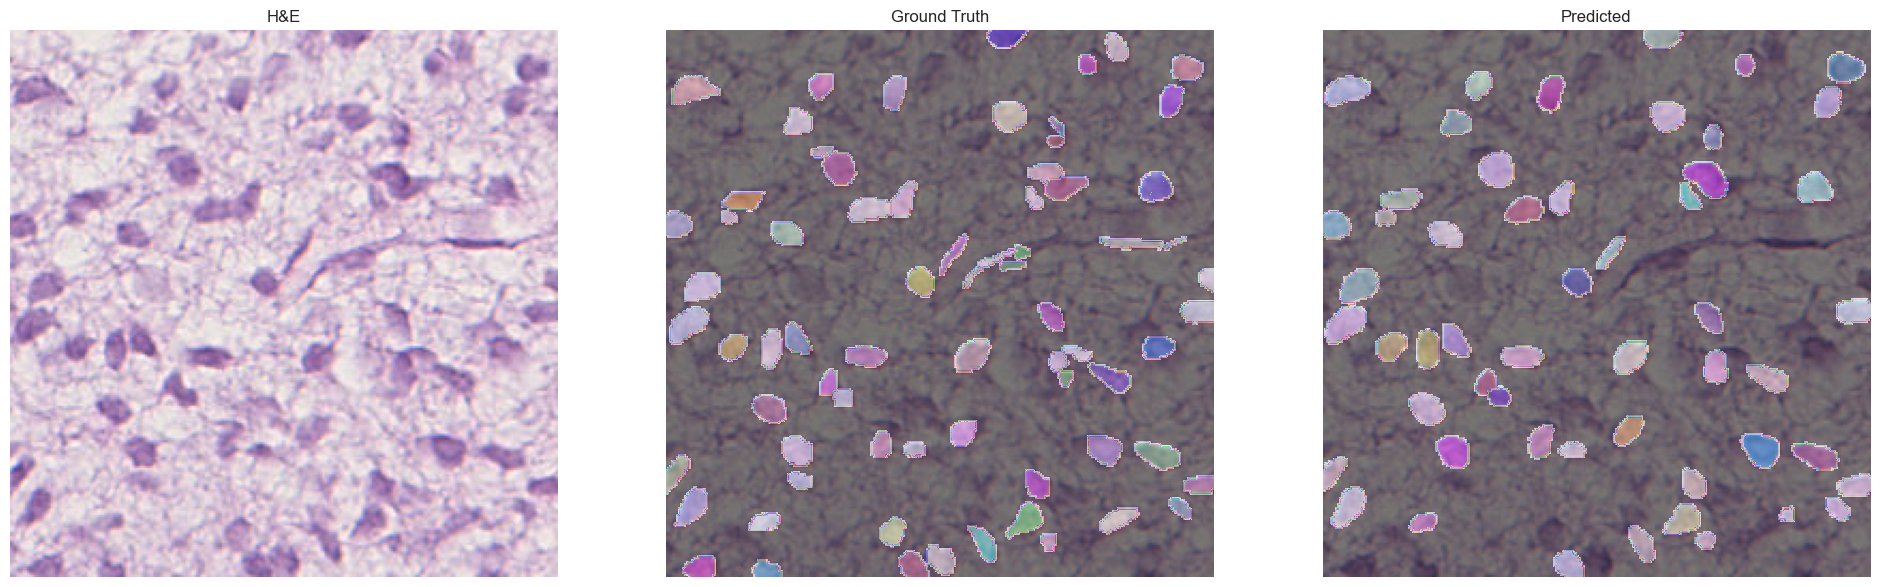

In [7]:
i = -2

tile = testing_tiles[i]
gt_mask = testing_masks[i]
pred_mask = predictions[i]

plot_predictions_vs_gt(tile, gt_mask, pred_mask, lbl_cmap)

In [8]:
taus = [0.6]

results = get_stats(testing_tiles_path, testing_masks, predictions, taus)

In [10]:
def make_f1_plot(HE_tiles_pth: str, results: pd.DataFrame, taus: list) \
        -> None:
    """idk yet"""
    nms = [os.path.basename(file) for file in os.listdir(HE_tiles_pth) if file.endswith('.tif')]
    names = results['Image']

    names = [name.split(".")[0] for name in names]  # this should be a list of the numbers at end of file names

    for i in range(len(names)):
        if len(names[i]) > 6:
            names[i] = names[i]

    f1_scores = results['F1 Score']

    index = np.arange(len(nms))

    # Plotting the bars
    fig = plt.figure(figsize=(25, 10))
    fig.set_facecolor('white')

    plt.bar(index, f1_scores, color='darksalmon')

    plt.xlabel("Tile Name", fontsize=20)
    plt.ylabel("F1 Score", fontsize=20)
    plt.title(f"F1 Scores in Testing Tiles (tau = {taus[0]})", fontsize=28)
    plt.axhline(y=0.7, linestyle='--', color='red', label=f'Target F1 = 0.7')
    plt.ylim(0, 1)
    plt.xticks(index, names)  # Set x-axis labels to tile names
    plt.legend(fontsize=20)
    plt.show()
    return

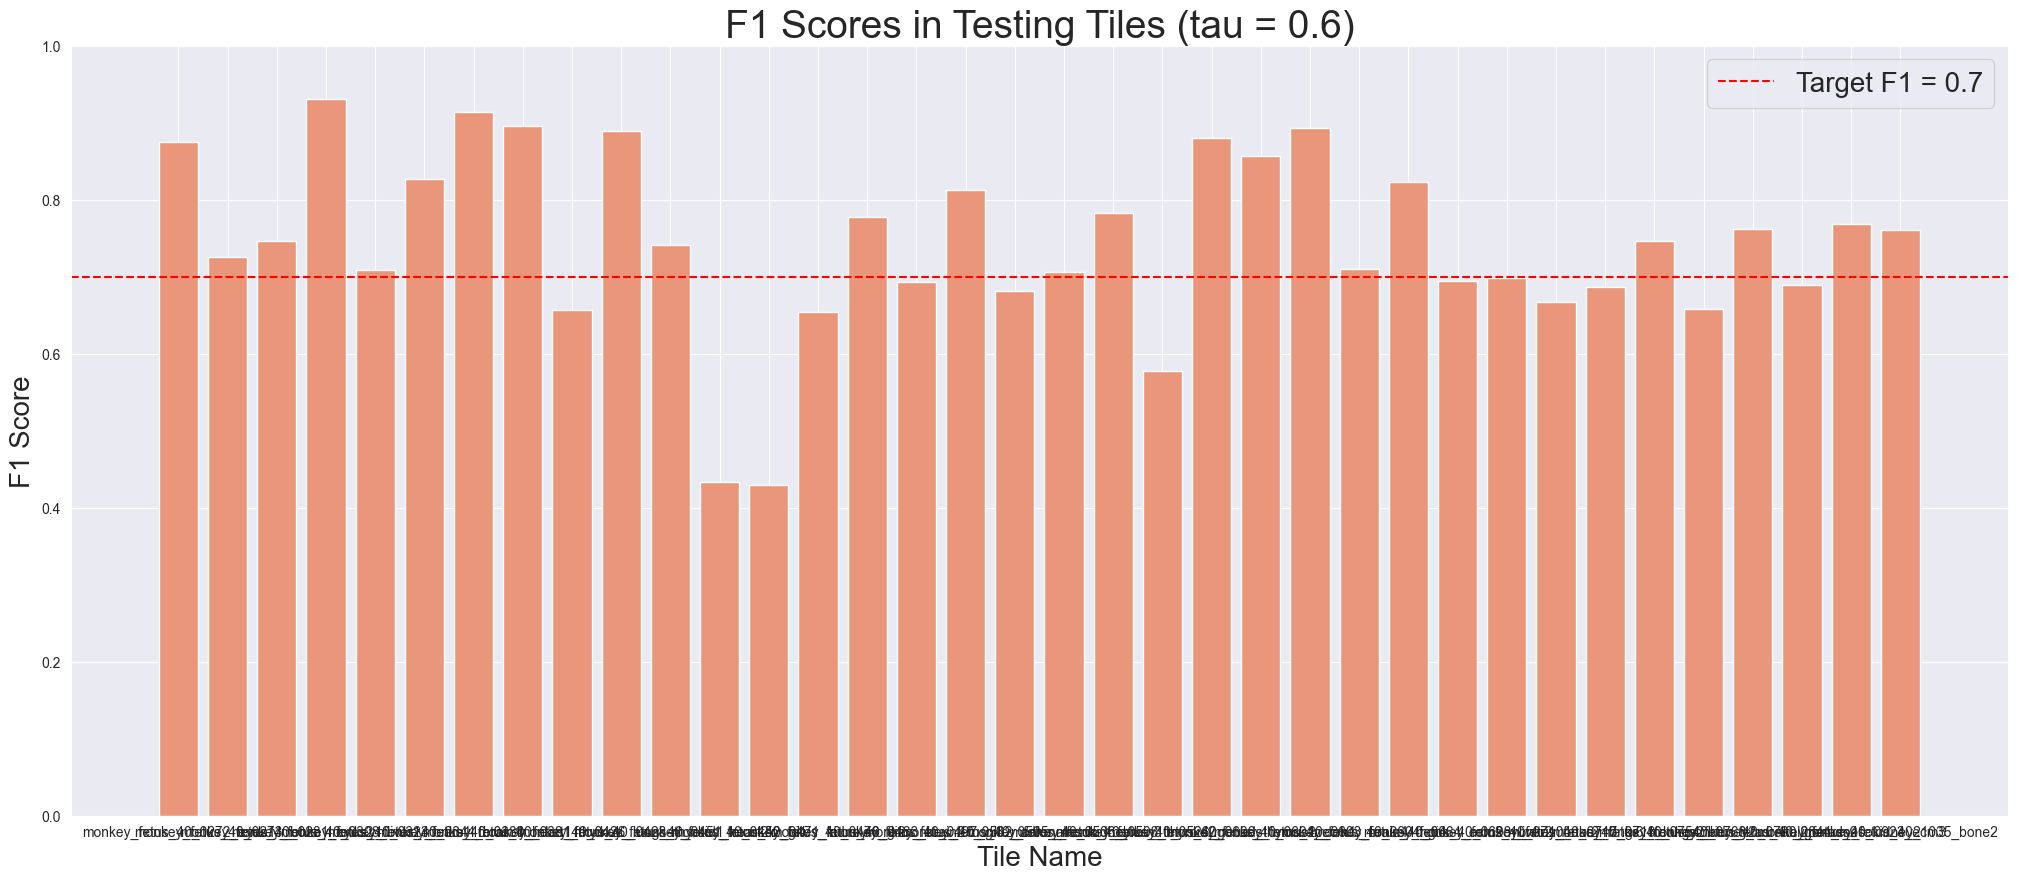

In [11]:
# right now, this function assumes first value in tau is the only tau
# you will probably need to go in and change the function to switch up the names since I am assuming all names start with "monkey_fetus_gestational_40" to get name of im
make_f1_plot(testing_tiles_path, results, taus)